Sathvik Reddy V


BL.EN.U4AIE23127


SPEECH PROCESSING LAB 4

In [1]:
!pip install soundfile
!pip install simpleaudio
!pip install librosa
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for simpleaudio
  Running setup.py clean for simpleaudio
Failed to build simpleaudio
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (simpleaudio)


1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio
import librosa
import librosa.display

In [11]:
y, sr = sf.read("/content/75064__corsica-s__farah-faucet.wav")
Audio(y, rate=sr)

In [12]:
num_samples = len(y)
duration = num_samples / sr

print("Sample rate (Hz):", sr)
print("Number of samples:", num_samples)
print("Total duration (sec):", round(duration, 3))


Sample rate (Hz): 44100
Number of samples: 950528
Total duration (sec): 21.554


In [13]:
!pip install transformers datasets torchaudio

Exception ignored in: <function Wave_write.__del__ at 0x7fa0b4653880>
Traceback (most recent call last):
  File "/usr/lib/python3.12/wave.py", line 465, in __del__
    self.close()
  File "/usr/lib/python3.12/wave.py", line 583, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.12/wave.py", line 606, in _ensure_header_written
    self._write_header(datasize)
  File "/usr/lib/python3.12/wave.py", line 610, in _write_header
    self._file.write(b'RIFF')
ValueError: I/O operation on closed file.


In [14]:
y_resampled = librosa.resample(y=y, orig_sr=sr, target_sr=16000)
sr = 16000
print(f"New sampling rate (Hz): {sr}")
print(f"Shape of resampled audio: {y_resampled.shape}")
Audio(y_resampled, rate=sr)

New sampling rate (Hz): 16000
Shape of resampled audio: (344863,)


In [16]:
!pip install librosa

Exception ignored in: <function Wave_write.__del__ at 0x7fa0b4653880>
Traceback (most recent call last):
  File "/usr/lib/python3.12/wave.py", line 465, in __del__
    self.close()
  File "/usr/lib/python3.12/wave.py", line 583, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.12/wave.py", line 606, in _ensure_header_written
    self._write_header(datasize)
  File "/usr/lib/python3.12/wave.py", line 610, in _write_header
    self._file.write(b'RIFF')
ValueError: I/O operation on closed file.


a

/tmp/ipython-input-2753255730.py:12: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(y_20s, sr=sr, x_axis='time')


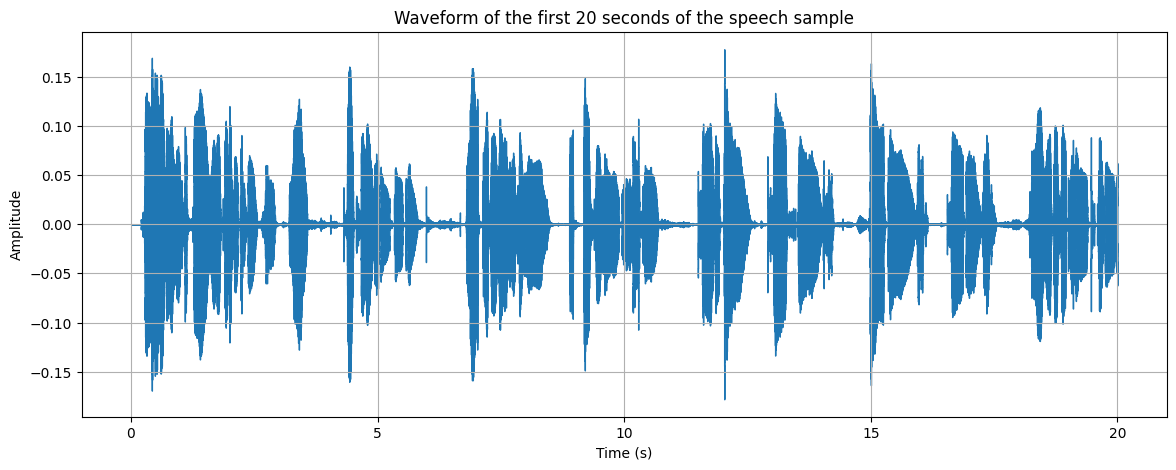

In [18]:
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

samples_20s = 20 * sr

y_20s = y_resampled[:samples_20s]

time_20s = np.arange(len(y_20s)) / sr

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y_20s, sr=sr, x_axis='time')
plt.title('Waveform of the first 20 seconds of the speech sample')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
Audio(y_20s, rate=sr)

b

In [24]:
frame_length_ms = 25
frame_shift_ms = 10

frame_length = int((frame_length_ms / 1000) * sr)
frame_shift = int((frame_shift_ms / 1000) * sr)

N = len(y_20s)

num_frames = int((N - frame_length) / frame_shift) + 1

print("Frame length (samples):", frame_length)
print("Frame shift (samples):", frame_shift)
print("Total number of frames:", num_frames)

Frame length (samples): 400
Frame shift (samples): 160
Total number of frames: 1998


c

In [26]:
frames = np.zeros((num_frames, frame_length))

for i in range(num_frames):
    start = i * frame_shift
    end = start + frame_length
    frames[i] = y_20s[start:end]

print("Shape of framed signal:", frames.shape)

Shape of framed signal: (1998, 400)


d

In [27]:
hamming_window = np.hamming(frame_length)

windowed_frames = frames * hamming_window

STE = np.zeros(num_frames)
STM = np.zeros(num_frames)
ZCR = np.zeros(num_frames)

Autocorr_peak = np.zeros(num_frames)
AMDF_min = np.zeros(num_frames)
AMSDF_min = np.zeros(num_frames)

for i in range(num_frames):

    frame = windowed_frames[i]

    STE[i] = np.sum(frame ** 2)

    STM[i] = np.sum(np.abs(frame))

    ZCR[i] = np.sum(np.abs(np.diff(np.sign(frame)))) / (2 * frame_length)

    autocorr = np.correlate(frame, frame, mode='full')
    autocorr = autocorr[len(autocorr)//2:]

    Autocorr_peak[i] = np.max(autocorr[1:])


    amdf = np.zeros(frame_length)
    for lag in range(1, frame_length):
        amdf[lag] = np.sum(np.abs(frame[:-lag] - frame[lag:]))

    AMDF_min[i] = np.min(amdf[1:])


    amsdf = np.zeros(frame_length)
    for lag in range(1, frame_length):
        amsdf[lag] = np.sum((frame[:-lag] - frame[lag:])**2)

    AMSDF_min[i] = np.min(amsdf[1:])

print("Feature extraction completed using Hamming window.")

Feature extraction completed using Hamming window.


In [28]:
print("STE:", STE)
print("STM:", STM)
print("ZCR:", ZCR)
print("Autocorr_peak:", Autocorr_peak)
print("AMDF_min:", AMDF_min)
print("AMSDF_min:", AMSDF_min)

STE: [2.38869503e-08 2.50014545e-08 1.53000545e-08 ... 2.68576667e-02
 6.46112361e-02 5.64192292e-02]
STM: [1.53614869e-03 1.50843270e-03 9.17518520e-04 ... 2.32166294e+00
 3.43079839e+00 3.16034858e+00]
ZCR: [0.7    0.72   0.805  ... 0.4125 0.6725 0.785 ]
Autocorr_peak: [1.12782418e-08 1.25279666e-08 9.76079535e-09 ... 2.33112075e-02
 2.85734716e-02 2.78326325e-02]
AMDF_min: [2.35910586e-06 1.31150866e-06 8.57610269e-08 ... 2.11154997e-03
 9.54760574e-04 9.08896163e-04]
AMSDF_min: [5.56538046e-12 7.47621913e-13 5.44324929e-15 ... 4.45864329e-06
 9.11567753e-07 4.17915950e-07]


e

In [29]:
rect_window = np.ones(frame_length)

rect_windowed_frames = frames * rect_window

STE_rect = np.zeros(num_frames)
STM_rect = np.zeros(num_frames)
ZCR_rect = np.zeros(num_frames)

Autocorr_peak_rect = np.zeros(num_frames)
AMDF_min_rect = np.zeros(num_frames)
AMSDF_min_rect = np.zeros(num_frames)

for i in range(num_frames):

    frame = rect_windowed_frames[i]

    STE_rect[i] = np.sum(frame ** 2)

    STM_rect[i] = np.sum(np.abs(frame))

    ZCR_rect[i] = np.sum(np.abs(np.diff(np.sign(frame)))) / (2 * frame_length)

    autocorr = np.correlate(frame, frame, mode='full')
    autocorr = autocorr[len(autocorr)//2:]
    Autocorr_peak_rect[i] = np.max(autocorr[1:])

    amdf = np.zeros(frame_length)
    for lag in range(1, frame_length):
        amdf[lag] = np.sum(np.abs(frame[:-lag] - frame[lag:]))
    AMDF_min_rect[i] = np.min(amdf[1:])

    amsdf = np.zeros(frame_length)
    for lag in range(1, frame_length):
        amsdf[lag] = np.sum((frame[:-lag] - frame[lag:])**2)
    AMSDF_min_rect[i] = np.min(amsdf[1:])

print("Feature extraction completed using Rectangular window.")

Feature extraction completed using Rectangular window.


In [30]:
print("STE:", STE_rect)
print("STM:", STM_rect)
print("ZCR:", ZCR_rect)
print("Autocorr_peak:", Autocorr_peak_rect)
print("AMDF_min:", AMDF_min_rect)
print("AMSDF_min:", AMSDF_min_rect)

STE: [6.04579372e-08 5.86981292e-08 3.64727536e-08 ... 9.28249063e-02
 1.35175517e-01 1.39106351e-01]
STM: [2.86588310e-03 2.65879880e-03 1.69978700e-03 ... 4.81360386e+00
 5.75980737e+00 5.94433754e+00]
ZCR: [0.7    0.72   0.805  ... 0.4125 0.6725 0.785 ]
Autocorr_peak: [2.82702533e-08 3.17006952e-08 1.97522423e-08 ... 6.28109701e-02
 6.08242717e-02 5.87404301e-02]
AMDF_min: [2.94888233e-05 1.55420276e-05 1.07201284e-06 ... 2.63943747e-02
 1.19345072e-02 1.13441838e-02]
AMSDF_min: [8.69590697e-10 1.08922293e-10 8.65979001e-13 ... 6.96663014e-04
 1.42432461e-04 6.51172533e-05]


f

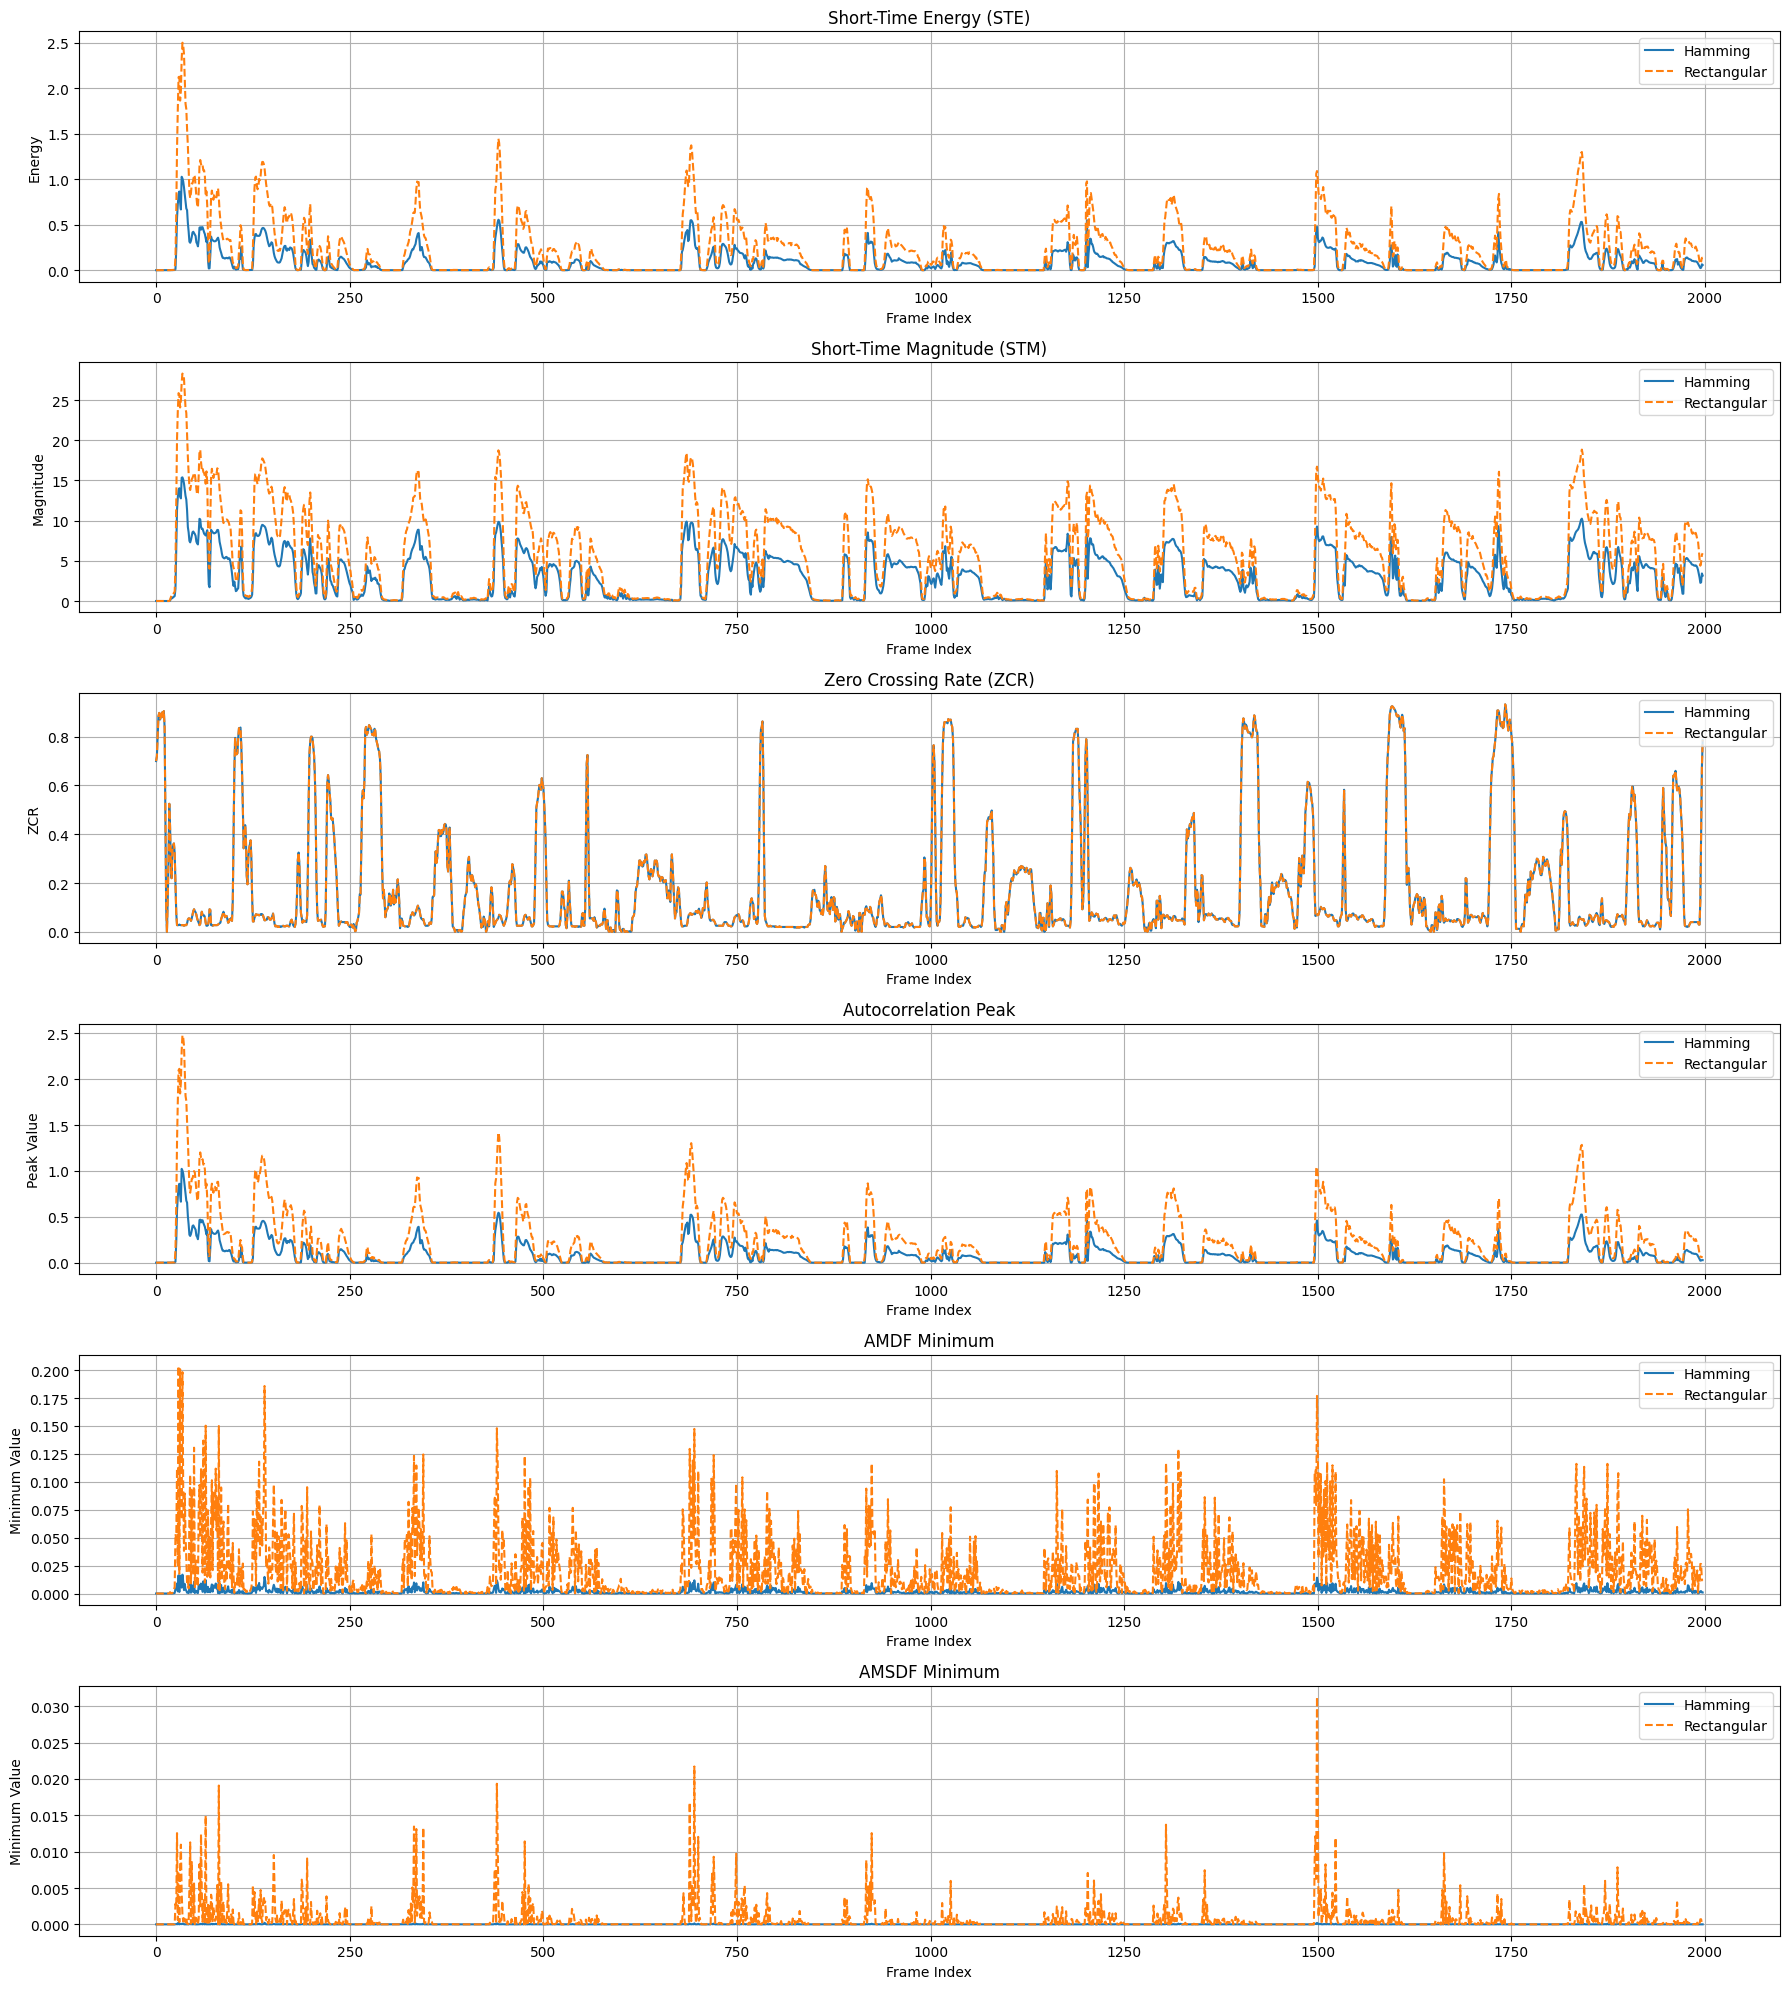

In [31]:
import matplotlib.pyplot as plt

frame_index = np.arange(num_frames)

plt.figure(figsize=(18, 20))

plt.subplot(6,1,1)
plt.plot(frame_index, STE, label='Hamming')
plt.plot(frame_index, STE_rect, linestyle='--', label='Rectangular')
plt.title("Short-Time Energy (STE)")
plt.xlabel("Frame Index")
plt.ylabel("Energy")
plt.legend()
plt.grid(True)

plt.subplot(6,1,2)
plt.plot(frame_index, STM, label='Hamming')
plt.plot(frame_index, STM_rect, linestyle='--', label='Rectangular')
plt.title("Short-Time Magnitude (STM)")
plt.xlabel("Frame Index")
plt.ylabel("Magnitude")
plt.legend()
plt.grid(True)

plt.subplot(6,1,3)
plt.plot(frame_index, ZCR, label='Hamming')
plt.plot(frame_index, ZCR_rect, linestyle='--', label='Rectangular')
plt.title("Zero Crossing Rate (ZCR)")
plt.xlabel("Frame Index")
plt.ylabel("ZCR")
plt.legend()
plt.grid(True)

plt.subplot(6,1,4)
plt.plot(frame_index, Autocorr_peak, label='Hamming')
plt.plot(frame_index, Autocorr_peak_rect, linestyle='--', label='Rectangular')
plt.title("Autocorrelation Peak")
plt.xlabel("Frame Index")
plt.ylabel("Peak Value")
plt.legend()
plt.grid(True)

plt.subplot(6,1,5)
plt.plot(frame_index, AMDF_min, label='Hamming')
plt.plot(frame_index, AMDF_min_rect, linestyle='--', label='Rectangular')
plt.title("AMDF Minimum")
plt.xlabel("Frame Index")
plt.ylabel("Minimum Value")
plt.legend()
plt.grid(True)

plt.subplot(6,1,6)
plt.plot(frame_index, AMSDF_min, label='Hamming')
plt.plot(frame_index, AMSDF_min_rect, linestyle='--', label='Rectangular')
plt.title("AMSDF Minimum")
plt.xlabel("Frame Index")
plt.ylabel("Minimum Value")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

g

In [32]:
energy_threshold = np.mean(STE)
zcr_threshold = np.mean(ZCR)

voiced_frames = []
unvoiced_frames = []

for i in range(num_frames):
    if STE[i] > energy_threshold and ZCR[i] < zcr_threshold:
        voiced_frames.append(i)
    else:
        unvoiced_frames.append(i)

print("Number of voiced frames:", len(voiced_frames))
print("Number of unvoiced frames:", len(unvoiced_frames))



Number of voiced frames: 653
Number of unvoiced frames: 1345


In [33]:
def avg_feature(feature, indices):
    return np.mean(feature[indices])

print("----- Voiced Frames Averages -----")
print("STE:", avg_feature(STE, voiced_frames))
print("STM:", avg_feature(STM, voiced_frames))
print("ZCR:", avg_feature(ZCR, voiced_frames))
print("Autocorr Peak:", avg_feature(Autocorr_peak, voiced_frames))
print("AMDF Min:", avg_feature(AMDF_min, voiced_frames))
print("AMSDF Min:", avg_feature(AMSDF_min, voiced_frames))

print("\n----- Unvoiced Frames Averages -----")
print("STE:", avg_feature(STE, unvoiced_frames))
print("STM:", avg_feature(STM, unvoiced_frames))
print("ZCR:", avg_feature(ZCR, unvoiced_frames))
print("Autocorr Peak:", avg_feature(Autocorr_peak, unvoiced_frames))
print("AMDF Min:", avg_feature(AMDF_min, unvoiced_frames))
print("AMSDF Min:", avg_feature(AMSDF_min, unvoiced_frames))

# this is for hamming window

----- Voiced Frames Averages -----
STE: 0.22014422670169603
STM: 6.283312086511529
ZCR: 0.04724349157733538
Autocorr Peak: 0.21603381781450612
AMDF Min: 0.003285432764958811
AMSDF Min: 1.661502533726657e-05

----- Unvoiced Frames Averages -----
STE: 0.024473460337297217
STM: 1.4504792448844297
ZCR: 0.23552044609665426
Autocorr Peak: 0.020281282778050986
AMDF Min: 0.000765370475862415
AMSDF Min: 1.734461847560425e-06


2

a

In [40]:
# Thresholds (heuristic approach)
autocorr_threshold = 0.25 * np.max(Autocorr_peak)
amdf_threshold = np.mean(AMDF_min)
amsdf_threshold = np.mean(AMSDF_min)

periodic_frames = []
aperiodic_frames = []

for i in range(num_frames):
    if (Autocorr_peak[i] > autocorr_threshold and
        AMDF_min[i] < amdf_threshold and
        AMSDF_min[i] < amsdf_threshold):
        periodic_frames.append(i)
    else:
        aperiodic_frames.append(i)

print("Number of periodic (voiced) frames:", len(periodic_frames))
print("Number of aperiodic (unvoiced) frames:", len(aperiodic_frames))

Number of periodic (voiced) frames: 55
Number of aperiodic (unvoiced) frames: 1943


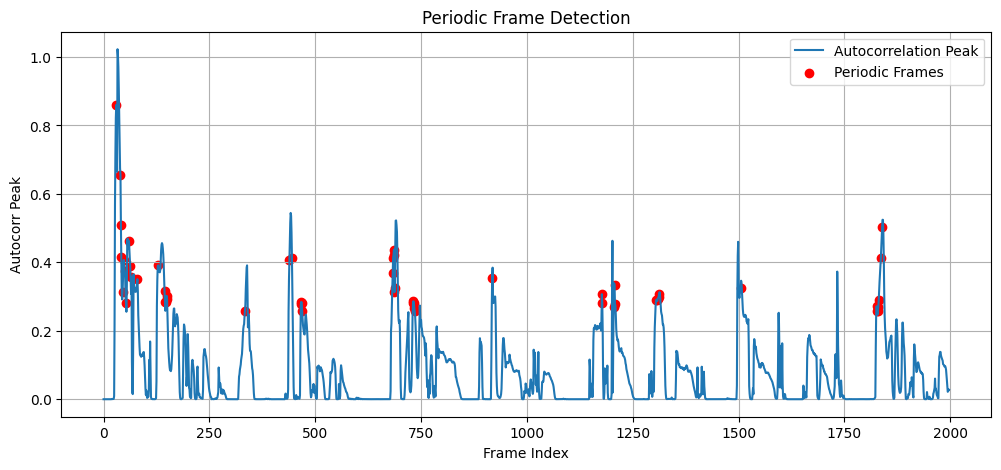

In [41]:
plt.figure(figsize=(12,5))
plt.plot(Autocorr_peak, label='Autocorrelation Peak')
plt.scatter(periodic_frames, Autocorr_peak[periodic_frames],
            color='red', label='Periodic Frames')
plt.xlabel("Frame Index")
plt.ylabel("Autocorr Peak")
plt.legend()
plt.grid(True)
plt.title("Periodic Frame Detection")
plt.show()

a

In [42]:
pitch_periods = []
pitch_frames = []

for i in periodic_frames:

    frame = windowed_frames[i]

    autocorr = np.correlate(frame, frame, mode='full')
    autocorr = autocorr[len(autocorr)//2:]

    autocorr[0] = 0


    min_lag = int(sr / 400)
    max_lag = int(sr / 80)

    lag = np.argmax(autocorr[min_lag:max_lag]) + min_lag

    pitch_periods.append(lag)
    pitch_frames.append(i)

print("Pitch period estimation completed.")
print("Example pitch periods (in samples):", pitch_periods[:10])

Pitch period estimation completed.
Example pitch periods (in samples): [np.int64(71), np.int64(77), np.int64(79), np.int64(80), np.int64(83), np.int64(85), np.int64(83), np.int64(79), np.int64(74), np.int64(73)]


In [46]:
print((pitch_frames))
print((pitch_periods))

[30, 40, 41, 42, 45, 48, 50, 53, 60, 63, 66, 80, 129, 144, 145, 148, 149, 150, 334, 439, 445, 466, 467, 468, 469, 683, 684, 685, 686, 687, 688, 731, 732, 733, 734, 735, 918, 1177, 1178, 1205, 1207, 1208, 1306, 1307, 1309, 1311, 1312, 1505, 1826, 1827, 1829, 1830, 1831, 1836, 1839]
[np.int64(71), np.int64(77), np.int64(79), np.int64(80), np.int64(83), np.int64(85), np.int64(83), np.int64(79), np.int64(74), np.int64(73), np.int64(72), np.int64(71), np.int64(85), np.int64(80), np.int64(80), np.int64(80), np.int64(81), np.int64(81), np.int64(90), np.int64(82), np.int64(86), np.int64(76), np.int64(78), np.int64(79), np.int64(80), np.int64(81), np.int64(80), np.int64(79), np.int64(77), np.int64(81), np.int64(82), np.int64(78), np.int64(78), np.int64(79), np.int64(79), np.int64(79), np.int64(87), np.int64(77), np.int64(78), np.int64(80), np.int64(81), np.int64(83), np.int64(85), np.int64(85), np.int64(85), np.int64(86), np.int64(86), np.int64(87), np.int64(78), np.int64(79), np.int64(79), np.

b

In [45]:

pitch_frequencies = []

for T0 in pitch_periods:
    if T0 != 0:
        f0 = sr / T0
    else:
        f0 = 0
    pitch_frequencies.append(f0)

print("Pitch frequency estimation completed.")
print("Example pitch frequencies (Hz):", pitch_frequencies[:10])

pitch_frequencies = np.array(pitch_frequencies)

print("\nPitch Statistics:")
print("Minimum Pitch (Hz):", np.min(pitch_frequencies))
print("Maximum Pitch (Hz):", np.max(pitch_frequencies))
print("Average Pitch (Hz):", np.mean(pitch_frequencies))

Pitch frequency estimation completed.
Example pitch frequencies (Hz): [np.float64(225.35211267605635), np.float64(207.7922077922078), np.float64(202.53164556962025), np.float64(200.0), np.float64(192.7710843373494), np.float64(188.23529411764707), np.float64(192.7710843373494), np.float64(202.53164556962025), np.float64(216.21621621621622), np.float64(219.17808219178082)]

Pitch Statistics:
Minimum Pitch (Hz): 177.77777777777777
Maximum Pitch (Hz): 225.35211267605635
Average Pitch (Hz): 200.27300252437757
